In [26]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import statistics
from ipywidgets import IntProgress
from IPython.display import display
import seaborn as sns

In [47]:
anime = pd.read_csv("anime.csv")
rating = pd.read_csv("rating.csv")
print(rating.shape)
counts = rating["anime_id"].value_counts()
rating = rating[~rating["anime_id"].isin(counts[counts < 100].index)]
print(rating.shape)

#rating["user_id"] = rating["user_id"].apply(lambda x: f"user:{x}")
#rating["anime_id"] = rating["anime_id"].apply(lambda x: f"anime:{x}")

(7813737, 3)
(6608927, 3)


In [29]:
len(rating["anime_id"].unique())

11200

In [37]:
anime = list(rating["anime_id"].value_counts())
print(f"mean:{np.mean(anime)} min: {np.min(anime)} max: {np.max(anime)} std: {np.std(anime)} median: {np.median(anime)}")
users = list(rating["user_id"].value_counts())
print(f"mean:{np.mean(users)} min: {np.min(users)} max: {np.max(users)} std: {np.std(users)} median: {np.median(users)}")

mean:697.6550892857143 min: 1 max: 39340 std: 2028.5371831562059 median: 51.5
mean:106.28765558049378 min: 1 max: 10227 std: 153.08551699780753 median: 57.0


In [5]:
print(len(rating))

7813737


In [29]:
n = 10
subset = rating.head(10000)
f = IntProgress(min=0, max=len(subset))
display(f)
ids = list(subset["anime_id"].value_counts()[:n].index)
reviewers = {val: [] for val in ids}
def add(row):
    f.value += 1
    if row["anime_id"] in ids:
        reviewers[row["anime_id"]].append(row["user_id"])  
subset.apply(add, axis=1)


IntProgress(value=0, max=10000)

0       None
1       None
2       None
3       None
4       None
        ... 
9995    None
9996    None
9997    None
9998    None
9999    None
Length: 10000, dtype: object

In [30]:
def intersection(lst1, lst2):
    return list(set(lst1) & set(lst2))

vals = [[0]*len(reviewers) for _ in range(len(reviewers))]
for i, x in enumerate(reviewers):
    for j, y in enumerate(reviewers):
        #vals[i][j] = (2 * len(intersection(reviewers[x], reviewers[y])) / (len(reviewers[x]) + len(reviewers[y])), len(intersection(reviewers[x], reviewers[y])), len(reviewers[x]), len(reviewers[y]))
        vals[i][j] = 2 * len(intersection(reviewers[x], reviewers[y])) / (len(reviewers[x]) + len(reviewers[y]))


<AxesSubplot:>

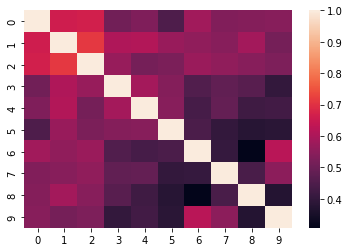

In [31]:
sns.heatmap(vals)

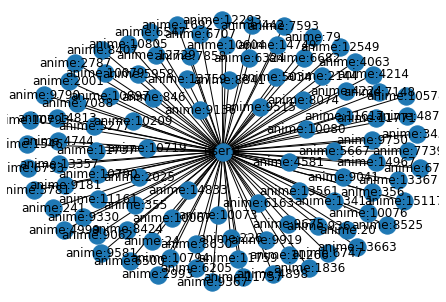

In [19]:
sub_rating = rating.head(100)
G = nx.from_pandas_edgelist(sub_rating, "user_id", "anime_id")
nx.draw(G, with_labels=True)
plt.show()

<AxesSubplot:xlabel='rating'>

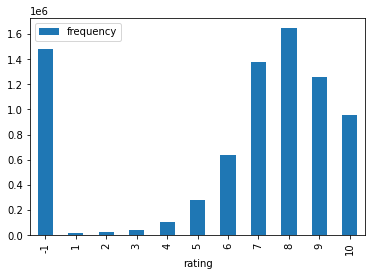

In [16]:
tmp = rating["rating"].value_counts()
index = [-1] + list(range(1, 11))
pd.DataFrame({"frequency": [tmp[i] for i in index], "rating": index}).plot.bar(x="rating", y="frequency")
#a -1 rating means the user viewed it but did not rate it